# Modeling and Evaluation

This notebook focuses on building, evaluating, and tuning machine learning models to predict housing prices in Brooklyn using the preprocessed data from the previous steps. We will implement various regression models, including linear regression, ridge regression, and lasso regression, and use cross-validation and hyperparameter tuning to optimize our models.


In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 

In [3]:
#reading in final dataset to apply linear regression
housing_df = pd.read_csv('housing_ml.csv')

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score 

In [5]:
num_vals_df = [ 'zip_code',  'year_built', 'year', 'land_density', 'unit_density', 'log_sale_price','log_land_square_feet', 'log_gross_square_feet', 'res_com_interaction','year_built_neighorhood_interaction']
housing_df_vals = housing_df[num_vals_df].copy()
housing_df_vals.replace([np.inf, -np.inf], np.nan, inplace=True)
housing_df_vals.fillna(0, inplace=True)

X = housing_df_vals
y = housing_df['log_sale_price']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R2 Score: {r2}')

MSE: 4.8302837544551515e-31
r2: 1.0


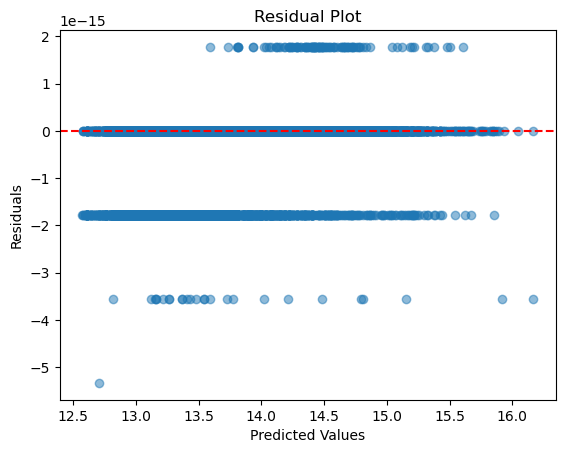

In [7]:
residuals = y_test - y_pred
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

In [15]:
#Applying GridSearchCV with Linear Regression 
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
model = LinearRegression()
params = {
    'fit_intercept': [True, False]
}

grid_search = GridSearchCV(model, params, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred) 

print(f"Best Parameters: {best_params}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Best Parameters: {'fit_intercept': True}
Mean Squared Error: 4.773466475856723e-30
R-squared: 1.0


In [40]:
#K Fold Cross Validation 

from sklearn.model_selection import cross_val_score

k = 5 
mse_score = cross_val_score(model, X, y, cv=k, scoring='neg_mean_squared_error')
rmse_score = np.sqrt(-mse_score)

mean_rmse = rmse_score.mean()
std_rmse = rmse_score.std()

print(f'Mean RMSE: {mean_rmse}')
print(f'Standard Deviation of RMSE: {std_rmse}')

Mean RMSE: 4.1139526378713354e-15
Standard Deviation of RMSE: 2.179059108035312e-15


In [16]:
#Checking results using Ridge Regression

from sklearn.linear_model import Ridge 
num_vals_df = [ 'zip_code',  'year_built', 'year', 'land_density', 'unit_density', 'log_sale_price','log_land_square_feet', 'log_gross_square_feet', 'res_com_interaction','year_built_neighorhood_interaction']
housing_df_vals = housing_df[num_vals_df].copy()
housing_df_vals.replace([np.inf, -np.inf], np.nan, inplace=True)
housing_df_vals.fillna(0, inplace=True)

X = housing_df_vals
y = housing_df['log_sale_price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
y_pred = ridge_model.predict(X_test)

ridge_mse = mean_squared_error(y_test, y_pred)
ridge_r2 = r2_score(y_test, y_pred)

print(f"Ridge Regression Mean Squared Error: {ridge_mse}")
print(f"Ridge Regression R-squared: {ridge_r2}")

Ridge Regression Mean Squared Error: 2.587018034039824e-09
Ridge Regression R-squared: 0.9999999907190247


In [20]:
#Applying Ridge Regression and CV 
from sklearn.linear_model import Ridge 
from sklearn.preprocessing import StandardScaler

num_vals_df = [ 'zip_code',  'year_built', 'year', 'land_density', 'unit_density', 'log_sale_price','log_land_square_feet', 'log_gross_square_feet', 'res_com_interaction','year_built_neighorhood_interaction']
housing_df_vals = housing_df[num_vals_df].copy()
housing_df_vals.replace([np.inf, -np.inf], np.nan, inplace=True)
housing_df_vals.fillna(0, inplace=True)

X = housing_df_vals
y = housing_df['log_sale_price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

ridge_model = Ridge()
params = {
    'alpha': [0.01, 0.1, 1, 10, 100],
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sag']
}
grid_search_ridge = GridSearchCV(ridge_model, params, cv=5, scoring='neg_mean_squared_error')
grid_search_ridge.fit(X_train, y_train)

best_ridge_params = grid_search_ridge.best_params_
best_ridge_model = grid_search_ridge.best_estimator_

y_pred_ridge = grid_search_ridge.predict(X_test)

ridge_mse = mean_squared_error(y_test, y_pred_ridge)
ridge_r2 = r2_score(y_test, y_pred_ridge)

print(f"Best Parameters for Ridge: {best_ridge_params}")
print(f"Ridge Regression Mean Squared Error: {ridge_mse}")
print(f"Ridge Regression R-squared: {ridge_r2}")

Best Parameters for Ridge: {'alpha': 0.01, 'solver': 'lsqr'}
Ridge Regression Mean Squared Error: 4.489603495266719e-06
Ridge Regression R-squared: 0.9999838934638565


In [47]:
#Checking results with Lasso Regression
from sklearn.linear_model import Lasso 

num_vals_df = [ 'zip_code',  'year_built', 'year', 'land_density', 'unit_density', 'log_sale_price','log_land_square_feet', 'log_gross_square_feet', 'res_com_interaction','year_built_neighorhood_interaction']
housing_df_vals = housing_df[num_vals_df].copy()
housing_df_vals.replace([np.inf, -np.inf], np.nan, inplace=True)
housing_df_vals.fillna(0, inplace=True)

X = housing_df_vals
y = housing_df['log_sale_price']

lasso_model = Lasso(alpha=1.0)
lasso_model.fit(X_train, y_train)
y_pred = lasso_model.predict(X_test)

lasso_mse = mean_squared_error(y_test, y_pred)
lasso_r2 = r2_score(y_test, y_pred)

print(f"Lasso Regression Mean Squared Error: {lasso_mse}")
print(f"Lasso Regression R-squared: {lasso_r2}")

Lasso Regression Mean Squared Error: 0.2506699824136786
Lasso Regression R-squared: 0.09380988675495139


In [24]:
#Checking Lasso with Grid Search
from sklearn.linear_model import Lasso 

num_vals_df = [ 'zip_code',  'year_built', 'year', 'land_density', 'unit_density', 'log_sale_price','log_land_square_feet', 'log_gross_square_feet', 'res_com_interaction','year_built_neighorhood_interaction']
housing_df_vals = housing_df[num_vals_df].copy()
housing_df_vals.replace([np.inf, -np.inf], np.nan, inplace=True)
housing_df_vals.fillna(0, inplace=True)

X = housing_df_vals
y = housing_df['log_sale_price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

lasso_model = Lasso()
params = {
    'alpha': [0.01, 0.1, 1, 10, 100]    
}

grid_search = GridSearchCV(lasso_model, params, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train) 

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)

lasso_mse = mean_squared_error(y_test, y_pred)
lasso_r2 = r2_score(y_test, y_pred)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Best Parameters: {best_params}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Best Parameters: {'alpha': 0.01}
Mean Squared Error: 9.969032944198102e-05
R-squared: 0.9996396122501122


In [25]:
#Pipeline - final Regression using Ridge with a pipeline set up

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

num_vals_df = [ 'zip_code',  'year_built', 'year', 'land_density', 'unit_density', 'log_sale_price','log_land_square_feet', 'log_gross_square_feet', 'res_com_interaction','year_built_neighorhood_interaction']
housing_df_vals = housing_df[num_vals_df].copy()
housing_df_vals.replace([np.inf, -np.inf], np.nan, inplace=True)
housing_df_vals.fillna(0, inplace=True)

X = housing_df_vals
y = housing_df['log_sale_price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_vals_df)
    ])

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', Ridge())
])

param_grid = {
    'model__alpha': [0.01, 0.1, 1, 10, 100]
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Best Parameters: {best_params}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Best Parameters: {'model__alpha': 0.01}
Mean Squared Error: 2.61101827092518e-14
R-squared: 0.9999999999999056
